# Step 1: Import Needed Libraries and Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Display all run results in a cell instead of last command only
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_ml=pd.read_csv('ML_data.csv',sep=',')
df_ml=df_ml.set_index('date')
df_ml.head()

,avg_air_flow_267,avg_float_level_47,% Iron Feed,Amina Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate
date,,,,,,,
2017-03-10 01:00:00,251.448000,483.4510,55.2,557.434,10.0664,1.74,1.31
2017-03-10 01:00:00,249.887667,473.0805,55.2,563.965,10.0672,1.74,1.31
2017-03-10 01:00:00,249.096667,454.1275,55.2,568.054,10.0680,1.74,1.31
2017-03-10 01:00:00,252.018667,436.9395,55.2,568.665,10.0689,1.74,1.31
2017-03-10 01:00:00,250.349000,439.6745,55.2,558.167,10.0697,1.74,1.31


# Step 2: Build Pipelines for different Regression ML Algorithms

In [3]:
# Building pipelines that

# 1) scale the data using MinMaxScaler:
    #from sklearn; Transforms features by scaling each feature to a given range. This estimator scales and
    #translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
    
# 2) fits data to different regression algorithms    

pipe_lin = Pipeline([('scaler', MinMaxScaler()), ('Linear Regression', LinearRegression())])
pipe_SGDR = Pipeline([('scaler', MinMaxScaler()), ('SGDR', SGDRegressor())])
pipe_Ridge = Pipeline([('scaler', MinMaxScaler()), ('Ridge', Ridge())])
pipe_Lasso = Pipeline([('scaler', MinMaxScaler()), ('Lasso', Lasso())])
pipe_KNN = Pipeline([('scaler', MinMaxScaler()), ('KNN Regressor', KNeighborsRegressor())])
pipe_DTR = Pipeline([('scaler', MinMaxScaler()), ('Decision Tree Regressor', DecisionTreeRegressor())])
pipe_RFR = Pipeline([('scaler', MinMaxScaler()), ('Random Forest Regressor', RandomForestRegressor(random_state = 42))])
pipe_GBR = Pipeline([('scaler', MinMaxScaler()), ('GBR', GradientBoostingRegressor(random_state = 42))])


#Creating a list of pipelines for looping later on
pipelines= [pipe_lin, pipe_SGDR, pipe_Ridge, pipe_Lasso, pipe_KNN, pipe_DTR, pipe_RFR, pipe_GBR]

#creating a dictionary with keys 
pipeline_dict = {0: 'Linear Regression', 1: 'SGDR', 2: 'Ridge', 3: 'Lasso', 
                 4:'KNN Regressor', 5: 'Decision Tree Regressor', 6: 'Random Forest Regressor', 7: 'Gradient Boosting Regressor'}

# Step 3: Split Data into Test and Train sets

In [4]:
# convert dataframe into multidimentional array
array=df_ml.values

# Define features
X = array[:,:-1]

# Define Target
Y = array[:,-1]

#Split Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((259856, 6), (86619, 6), (259856,), (86619,))

In [5]:
#take out warnings that are not that important
import warnings; warnings.simplefilter('ignore')

# Step 4: Train and Score Models using Cross Validation and RMSE

In [6]:
# The following code takes roughly 6 minutes to run using 2.21 Ghz and 16 GB RAM computer, time taken may vary according to machine capabilities
# you may reduce number of n_splits for faster run, but may have lower results
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

results = []
std = []
for idx, val in enumerate(pipelines):
    kfold = KFold(n_splits = 10, random_state = 42)
    cv_results = cross_val_score(val, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_results)
    results.append(rmse_scores.mean())
    std.append(rmse_scores.std())
    print("{0}{1}: {2:.3f} ({3:.3f})".format(pipeline_dict[idx], ' RMSE Score', results[idx], std[idx]))

Linear Regression RMSE Score: 0.817 (0.003)
SGDR RMSE Score: 0.817 (0.003)
Ridge RMSE Score: 0.817 (0.003)
Lasso RMSE Score: 0.879 (0.004)
KNN Regressor RMSE Score: 0.376 (0.005)
Decision Tree Regressor RMSE Score: 0.381 (0.006)
Random Forest Regressor RMSE Score: 0.292 (0.003)
Gradient Boosting Regressor RMSE Score: 0.727 (0.004)


## Checkpoint 1: Random Forest Regressor has the best RMSE Score with the a low Standard Deviation, the next step is to validate the model using test Data

# Step 5: Validate Model using Test Data

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler=MinMaxScaler()
X_tr_scale=scaler.fit_transform(X_train)
X_te_scale=scaler.transform(X_test)

rfr_model = RandomForestRegressor().fit(X_tr_scale, y_train)

y_pred = rfr_model.predict(X_te_scale)
Final_mse = mean_squared_error(y_test, y_pred)
Final_rmse = np.sqrt(Final_mse)
print('RMSE: {0:.3f}'.format(Final_rmse))
print('R2: {0:.3f}'.format(rfr_model.score(X_te_scale, y_test)))

RMSE: 0.282
R2: 0.897


## Checkpoint 2: RMSE Score on test data is fairly close to one gotten on train data, Also R2 value was 0.897-0.9 which is a great fit

In [22]:
pred_vs_actual=pd.DataFrame(columns=['Predicted Test values','Actual Test values','diff'])
pred_vs_actual['Predicted Test values']=y_pred
pred_vs_actual['Actual Test values']=y_test
pred_vs_actual['diff']=pred_vs_actual['Predicted Test values']-pred_vs_actual['Actual Test values']

pred_vs_actual.head(20)

,Predicted Test values,Actual Test values,diff
0,2.322,2.47,-1.480000e-01
1,1.433,1.70,-2.670000e-01
2,1.090,1.09,2.220446e-16
3,1.459,1.46,-1.000000e-03
4,3.870,3.87,8.881784e-16
5,1.196,1.15,4.600000e-02
6,1.830,1.68,1.500000e-01
7,1.250,1.25,0.000000e+00
8,1.518,1.59,-7.200000e-02
9,3.695,3.73,-3.500000e-02


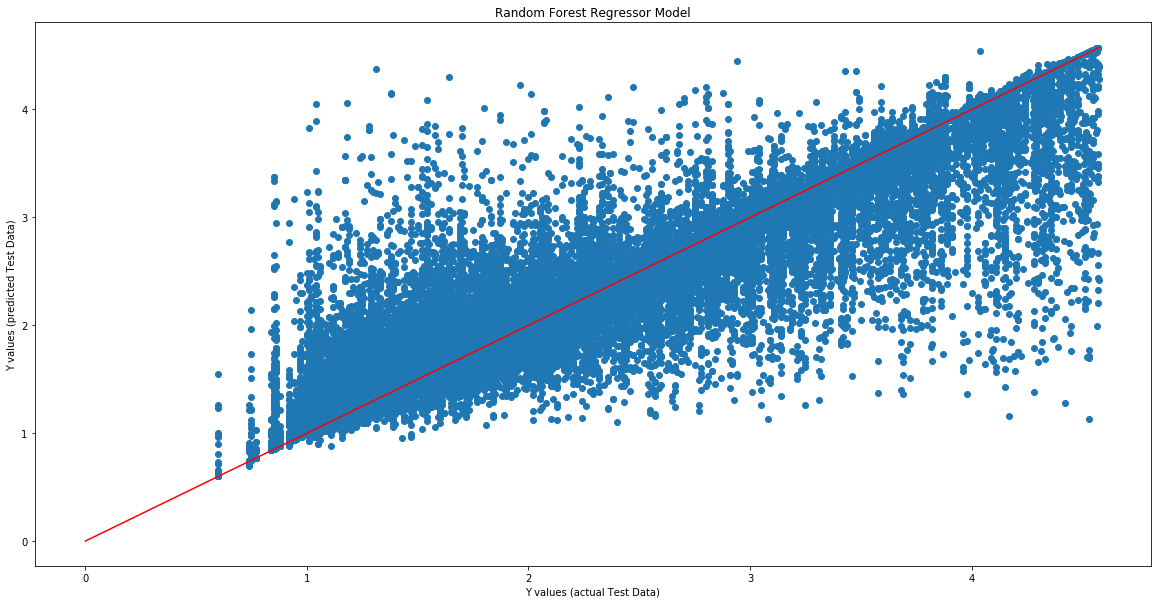

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.set(title = "Random Forest Regressor Model", xlabel = "Y values (actual Test Data)", ylabel = "Y values (predicted Test Data)")
ax.scatter(y_test, y_pred)
ax.plot([0, max(y_test)], [0, max(y_pred)], color = 'r')
fig.show();

In [24]:
def evaluate(predictions, test_data):
    errors = abs(predictions - test_data)
    mape = 100 * np.mean(errors / test_data)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))
    
    return accuracy

In [25]:
base_accuracy = evaluate(y_pred, y_test)

Model Performance
Average Error: 0.1234
Accuracy = 93.64%


# Step 6: Improving Model using Simple Hyperparameter Tuning

In [26]:
#check available parameters to tune, from random forest documentation in SKlearn

#n_estimators = number of trees in the foreset
#max_features = max number of features considered for splitting a node
#max_depth = max number of levels in each decision tree
#min_samples_split = min number of data points placed in a node before the node is split
#min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)

rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [13]:
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler()
X_tr_scale=scaler.fit_transform(X_train)

param_grid = {'max_depth': [10,50], 'n_estimators': [10,30]}


model = RandomForestRegressor(random_state = 42)

#using smaller number of splits for speed
kfold = KFold(n_splits = 3, random_state = 42)
grid_search = GridSearchCV(model, param_grid, cv = kfold, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 50], 'n_estimators': [10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [27]:
from sklearn.metrics import mean_squared_error

Final_Model = grid_search.best_estimator_ 
Final_Model.fit(X_tr_scale, y_train)

X_te_scale = scaler.transform(X_test)
y_pred_tuned = Final_Model.predict(X_te_scale)
Final_mse = mean_squared_error(y_test, y_pred)
Final_rmse = np.sqrt(Final_mse)
print('RMSE: {0:.3f}'.format(Final_rmse))
print('R2: {0:.3f}'.format(Final_Model.score(X_te_scale, y_test)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

RMSE: 0.282
R2: 0.908


In [28]:
Tuned_accuracy = evaluate(y_pred_tuned, y_test)

Model Performance
Average Error: 0.1199
Accuracy = 93.80%


## Final: Simple Hyperparaemter tunning increased model performance by 0.16% in terms of accuracy, further hyperparatemer tuning may be proven beneficial with larger n_splits in cross validation.